# CS145 Howework 1 

<span style="color:red"> **Important Note:** </span>
HW1 is due on **11:59 PM PT, Oct 19 (Monday, Week 3)**. Please submit through GradeScope (you will receive an invite to Gradescope for CS145 Fall 2020.). 

## Print Out Your Name and UID

<span style="color:blue"> **Name: Terry Ye, UID: 004757414** </span>

## Before You Start

You need to first create HW1 conda environment by the given `cs145hw1.yml` file, which provides the name and necessary packages for this tasks. If you have `conda` properly installed, you may create, activate or deactivate by the following commands:

```
conda env create -f cs145hw1.yml
conda activate hw1
conda deactivate
```
OR 

```
conda env create --name NAMEOFYOURCHOICE -f cs145hw1.yml 
conda activate NAMEOFYOURCHOICE
conda deactivate
```
To view the list of your environments, use the following command:
```
conda env list
```

More useful information about managing environments can be found [here](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html).

You may also quickly review the usage of basic Python and Numpy package, if needed in coding for matrix operations.

In this notebook, you must not delete any code cells in this notebook. If you change any code outside the blocks that you are allowed to edit (between `STRART/END YOUR CODE HERE`), you need to highlight these changes. You may add some additional cells to help explain your results and observations.

In [1]:
import numpy as np 
import pandas as pd
import sys 
import random as rd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

If you can successfully run the code above, there will be no problem for environment setting.

## 1. Linear regression 
This workbook will walk you through a linear regression example. 

In [2]:
from hw1code.linear_regression import LinearRegression

lm=LinearRegression()
lm.load_data('./data/linear-regression-train.csv','./data/linear-regression-test.csv')
# As a sanity check, we print out the size of the training data (1000, 100) and training labels (1000,)
print('Training data shape: ', lm.train_x.shape)
print('Training labels shape:', lm.train_y.shape)

Training data shape:  (1000, 100)
Training labels shape: (1000,)


In [3]:
def train_and_predict(lm, beta):
    train_predict_y = lm.predict(lm.train_x, beta)
    test_predict_y = lm.predict(lm.test_x, beta)
    training_error = lm.compute_mse(train_predict_y, lm.train_y)
    testing_error = lm.compute_mse(test_predict_y, lm.test_y)
    return training_error, testing_error

### 1.1 Closed form solution
In this section, complete the `getBeta` function in `linear_regression.py` which use the close for solution of $\hat{\beta}$.

Train you model by using `lm.train('0')` function.

Print the training error and the testing error using `lm.predict` and `lm.compute_mse` given.

In [4]:
from hw1code.linear_regression import LinearRegression

lm=LinearRegression()
lm.load_data('./data/linear-regression-train.csv','./data/linear-regression-test.csv')
training_error= 0
testing_error= 0
#========================#
# STRART YOUR CODE HERE  #
#========================#
beta = lm.train('0')
training_error, testing_error = train_and_predict(lm, beta)
#========================#
#   END YOUR CODE HERE   #
#========================# 
print('Training error is: ', training_error)
print('Testing error is: ', testing_error)

Learning Algorithm Type:  0
Training error is:  0.08693886675396784
Testing error is:  0.11017540281675803


### 1.2 Batch gradient descent
In this section, complete the `getBetaBatchGradient` function in `linear_regression.py` which compute the gradient of the objective fuction. 

Train you model by using `lm.train('1')` function.

Print the training error and the testing error using `lm.predict` and `lm.compute_mse` given.

In [5]:
"""add import here so can just run this cell alone when update the source code"""
from hw1code.linear_regression import LinearRegression

lm=LinearRegression()
lm.load_data('./data/linear-regression-train.csv','./data/linear-regression-test.csv')
training_error= 0
testing_error= 0
#========================#
# STRART YOUR CODE HERE  #
#========================#
beta = lm.train('1')
training_error, testing_error = train_and_predict(lm, beta)
#========================#
#   END YOUR CODE HERE   #
#========================# 
print('Training accuracy is: ', training_error)
print('Testing accuracy is: ', testing_error)

Learning Algorithm Type:  1
Training accuracy is:  0.08693895533150824
Testing accuracy is:  0.11016592170824556


### 1.3 Stochastic gadient descent 
In this section, complete the `getBetaStochasticGradient` function in `linear_regression.py`, which use an estimated gradient of the objective function.

Train you model by using `lm.train('2')` function.

Print the training error and the testing error using `lm.predict` and `lm.compute_mse` given.

In [6]:
"""add import here so can just run this cell alone when update the source code"""
from hw1code.linear_regression import LinearRegression

lm=LinearRegression()
lm.load_data('./data/linear-regression-train.csv','./data/linear-regression-test.csv')
training_error= 0
testing_error= 0
#========================#
# STRART YOUR CODE HERE  #
#========================#
beta = lm.train('2')
training_error, testing_error = train_and_predict(lm, beta)
#========================#
#   END YOUR CODE HERE   #
#========================# 
print('Training accuracy is: ', training_error)
print('Testing accuracy is: ', testing_error)

Learning Algorithm Type:  2
Training accuracy is:  0.09337211730536127
Testing accuracy is:  0.11828923255919811


In [7]:
"""Normalize data"""
from hw1code.linear_regression import LinearRegression

lm=LinearRegression()
lm.load_data('./data/linear-regression-train.csv','./data/linear-regression-test.csv')
lm.normalize()
for train_type in ['0', '1', '2']:
    beta = lm.train(train_type)
    training_error, testing_error = train_and_predict(lm, beta)
    print('Training error for ' + train_type + ' = ', training_error )
    print('Testing error for ' + train_type + ' = ', testing_error )

Learning Algorithm Type:  0
Training error for 0 =  0.08693886675396784
Testing error for 0 =  0.11017540281675804
Learning Algorithm Type:  1
Training error for 1 =  0.10024222412685467
Testing error for 1 =  0.14039955364152018
Learning Algorithm Type:  2
Training error for 2 =  0.0869952008695027
Testing error for 2 =  0.1099647262725722


### Questions: 
1. Compare the MSE on the testing dataset for each version. Are they the same? Why or why not?
2. Apply z-score normalization for eachh featrure and comment whether or not it affect the three algorithm. 
3. Ridge regression is adding an L2 regularization term to the original objective function of mean squared error. The objective function become following: 
    $$ J(\beta) = \frac{1}{2n} \sum_i \left(x_i^T\beta - y_i \right)^2 + \frac{\lambda}{2n} \sum_j \beta_j^2 ,$$ 
where $\lambda \leq 0$, which is a hyper parameter that controls the trade off. Take the derivative of this provided objective function and derive the closed form solution for $\beta$. 

### Your answer here: 


<span style="color:blue"> 
    1. The testing errors are not the same and slightly different. The Closed Form and Batch Gradient performed similarly while the Stochastic Graident performed a bit worse. I think Closed Form and Batch Gradient all reached the optimum and the little difference is because Batch Gradient has learning rate which prevents it from achieving the absolute best in limited iterations. The Stochastic Graidient performed worse maybe because the learning rate is smaller and it converges much slower.<br>
    2. It does not affect the Closed Form algorithm but affects Batch Gradient and Stochastic Gradient algorithms. <br>
    3. The matrix form of objective function can be written as 
        $ \frac{1}{2n}(X\beta - y)^T(X\beta - y) + \frac{\lambda}{2n}\beta^T\beta $ <br>
       Taking derivative of the matrix form as 0:
        $ J(\beta)' = (X^TX\beta - X^Ty)/n + \frac{\lambda}{n}\beta = 0$ <br>
       So $(X^TX + \lambda)\beta = X^Ty$, the closed form solution of $\beta$ is 
        $$ \beta = （X^TX + \lambda I)^{-1}X^Ty$$
</span>

## 2. Logistic regression 
This workbook will walk you through a logistic regression example. 

In [8]:
from hw1code.logistic_regression import LogisticRegression

lm=LogisticRegression()
lm.load_data('./data/logistic-regression-train.csv','./data/logistic-regression-test.csv')
# As a sanity chech, we print out the size of the training data (1000, 5) and training labels (1000,)
print('Training data shape: ', lm.train_x.shape)
print('Training labels shape:', lm.train_y.shape)

Training data shape:  (1000, 5)
Training labels shape: (1000,)


In [9]:
def train_and_predict_logistic(lm, beta):
    train_predict_y = lm.predict(lm.train_x, beta)
    test_predict_y = lm.predict(lm.test_x, beta)
    training_accuracy = lm.compute_accuracy(train_predict_y, lm.train_y)
    testing_accuracy = lm.compute_accuracy(test_predict_y, lm.test_y)
    return training_accuracy, testing_accuracy

### 2.1 Batch gradiend descent
In this section, complete the `getBeta_BatchGradient` in `logistic_regression.py`, which compute the gradient of the log likelihoood function. 

Complete the `compute_avglogL` function in `logistic_regression.py` for sanity check. 

Train you model by using `lm.train('0')` function.

And print the training and testing accuracy using `lm.predict` and `lm.compute_accuracy` given. 

In [10]:
"""add import here so can just run this cell alone when update the source code"""
from hw1code.logistic_regression import LogisticRegression

lm=LogisticRegression()
lm.load_data('./data/logistic-regression-train.csv','./data/logistic-regression-test.csv')
training_accuracy= 0
testing_accuracy= 0
#========================#
# STRART YOUR CODE HERE  #
#========================#
lm.normalize()
beta = lm.train('0')
training_accuracy, testing_accuracy = train_and_predict_logistic(lm, beta)
#========================#
#   END YOUR CODE HERE   #
#========================# 
print('Training accuracy is: ', training_accuracy)
print('Testing accuracy is: ', testing_accuracy)

average logL for iteration 0: -0.48427563333314566 	
average logL for iteration 1000: -0.46010037535085324 	
average logL for iteration 2000: -0.46010037535085324 	
average logL for iteration 3000: -0.46010037535085324 	
average logL for iteration 4000: -0.46010037535085324 	
average logL for iteration 5000: -0.46010037535085324 	
average logL for iteration 6000: -0.46010037535085324 	
average logL for iteration 7000: -0.46010037535085324 	
average logL for iteration 8000: -0.46010037535085324 	
average logL for iteration 9000: -0.46010037535085324 	
Training avgLogL:  -0.46010037535085324
Training accuracy is:  0.797
Testing accuracy is:  0.7534791252485089


### 2.2 Newton Raphhson
In this section, complete the `getBeta_Newton` in `logistic_regression.py`, which make use of both first and second derivative.

Train you model by using `lm.train('1')` function.

Print the training and testing accuracy using `lm.predict` and `lm.compute_accuracy` given. 

In [11]:
"""add import here so can just run this cell alone when update the source code"""
from hw1code.logistic_regression import LogisticRegression

lm=LogisticRegression()
lm.load_data('./data/logistic-regression-train.csv','./data/logistic-regression-test.csv')
training_accuracy= 0
testing_accuracy= 0
#========================#
# STRART YOUR CODE HERE  #
#========================#
lm.normalize()
beta = lm.train('1')
training_accuracy, testing_accuracy = train_and_predict_logistic(lm, beta)
#========================#
#   END YOUR CODE HERE   #
#========================# 
print('Training accuracy is: ', training_accuracy)
print('Testing accuracy is: ', testing_accuracy)

average logL for iteration 0: -0.5564001859888966 	
average logL for iteration 500: -0.46010037535085324 	
average logL for iteration 1000: -0.46010037535085324 	
average logL for iteration 1500: -0.46010037535085324 	
average logL for iteration 2000: -0.46010037535085324 	
average logL for iteration 2500: -0.46010037535085324 	
average logL for iteration 3000: -0.46010037535085324 	
average logL for iteration 3500: -0.46010037535085324 	
average logL for iteration 4000: -0.46010037535085324 	
average logL for iteration 4500: -0.46010037535085324 	
average logL for iteration 5000: -0.46010037535085324 	
average logL for iteration 5500: -0.46010037535085324 	
average logL for iteration 6000: -0.46010037535085324 	
average logL for iteration 6500: -0.46010037535085324 	
average logL for iteration 7000: -0.46010037535085324 	
average logL for iteration 7500: -0.46010037535085324 	
average logL for iteration 8000: -0.46010037535085324 	
average logL for iteration 8500: -0.46010037535085324

### Questions: 
1. Compare the accuracy on the testing dataset for each version. Are they the same? Why or why not?
2. Regularization. Similar to linear regression, an regularization term could be added to logistic regression. 
The objective function becomes following: 
    $$ J(\beta) = -\frac{1}{n} \sum_i \left(y_i x_i^T \beta - \log \left( 1+ \exp\{ x_i^T \beta \} \right) \right) + \lambda \sum_j \beta_j^2,$$ 
where $\lambda \leq 0$, which is a hyper parameter that controls the trade off. Take the derivative $\frac{\partial J(\beta)}{\partial \beta_j}$ of this provided objective function and provide the batch gradient descent update.

### Your answer here:

<span style="color:blue"> 
    1. They are the same because both methods achieve the optimum for log likelihood and the result beta is unique. <br>
    2. The derivative of new objective function is the derivative of original J + derivate of regularization term. 
        $$ \frac{\partial J(\beta)}{\partial \beta_j} = \sum_{i=1}^Nx_{ij}(y_i-p_i(\beta)) + 2\lambda\beta_j$$ 
       The batch gradient update is 
        $$ \beta^{new} = \beta^{old} + \eta v(v_j = \sum_{i=1}^Nx_{ij}(y_i-p_i(\beta)) + 2\lambda\beta_j)$$
    
</span>

### 2.3 Visualize the decision boundary on a toy dataset

In this subsection, you will use the same implementation for another small dataset with each datapoint $x$ with only two features $(x_1, x_2)$ to visualize the decision boundary of logistic regression model.

In [12]:
from hw1code.logistic_regression import LogisticRegression

lm=LogisticRegression(verbose = False)
lm.load_data('./data/logistic-regression-toy.csv','./data/logistic-regression-toy.csv')
# As a sanity chech, we print out the size of the training data (99,2) and training labels (99,)
print('Training data shape: ', lm.train_x.shape)
print('Training labels shape:', lm.train_y.shape)

Training data shape:  (99, 2)
Training labels shape: (99,)


In the following block, you can apply the same implementation of logistic regression model (either in 2.1 or 2.2) to the toy dataset. Print out the $\hat{\beta}$ after training and accuracy on the train set.  

In [13]:
training_accuracy= 0
#========================#
# STRART YOUR CODE HERE  #
#========================#
beta = lm.train('0')
train_predict_y = lm.predict(lm.train_x, beta)
training_accuracy = lm.compute_accuracy(train_predict_y, lm.train_y)
print(beta)
#========================#
#   END YOUR CODE HERE   #
#========================# 
print('Training accuracy is: ', training_accuracy)

Training avgLogL:  -0.329147431295712
[-2.6205116   0.76037154  1.17194674]
Training accuracy is:  0.8888888888888888


Next, we try to plot the decision boundary of your learned logistic regression classifier. Generally, a decision boundary is the region of a space in which the output label of a classifier is ambiguous. That is, in the given toy data, given a datapoint $x=(x_1, x_2)$ on the decision boundary, the logistic regression classifier cannot decide whether $y=0$ or $y=1$. 

### Question

Is the decision boundary for logistic regression linear? Why or why not?

### Your answer here:

<span style="color:blue">
    Yes it is linear as there are only two variables involved with only first indexes.
</span>

Draw the decision boundary in the following cell. Note that the code to plot the raw data points are given. You may need `plt.plot` function (see [here](https://matplotlib.org/tutorials/introductory/pyplot.html)). 

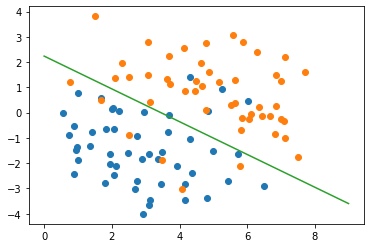

In [14]:
# scatter plot the raw data
df = pd.concat([lm.train_x, lm.train_y], axis=1)
groups = df.groupby("y")
for name, group in groups:
    plt.plot(group["x1"], group["x2"], marker="o", linestyle="", label=name)
    
# plot the decision boundary on top of the scattered points
#========================#
# STRART YOUR CODE HERE  #
#========================#

x1_values = [i for i in np.arange(0,9,0.01)]
x2_values = []

# boundary: x1*beta[1] + x2*beta[2] + beta[0] = 0
for x1 in x1_values:
    x2 = (-beta[0] - x1*beta[1]) / beta[2]
    x2_values.append(x2)

plt.plot(x1_values, x2_values)
#========================#
#   END YOUR CODE HERE   #
#========================#
plt.show()

# End of Homework 1 :)
After you've finished the homework, please print out the entire `ipynb` notebook and two `py` files into one PDF file. Make sure you include the output of code cells and answers for questions. Prepare submit it to GradeScope. 